In [1]:
from seir_models import *
from seir_utils import *
import numpy as np
np.random.seed(42)

In [2]:
# === LOAD DATA ===
filepath = "epi_data_comparison/simulation_outputs/normal/output_luxembourg.csv"
initial_conditions, observed = extract_initial_conditions_and_observed(filepath)


In [3]:
times = np.arange(len(observed))

Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Current   Time    
0     7     -5.27e+09 -5.27e+09   0:00.0
1     14    -3.27e+09 -3.27e+09   0:00.0
2     21    -5.34e+08 -5.34e+08   0:00.0
3     28    -5.34e+08 -3.3e+09    0:00.1
20    147   -2.8e+08  -5.08e+08   0:00.1
40    287   -2.73e+08 -2.73e+08   0:00.2
60    427   -2.72e+08 -2.72e+08   0:00.3
80    567   -2.72e+08 -2.72e+08   0:00.4
100   707   -2.72e+08 -2.72e+08   0:00.5
120   847   -2.72e+08 -2.72e+08   0:00.5
140   987   -2.72e+08 -2.72e+08   0:00.6
160   1127  -2.72e+08 -2.72e+08   0:00.7
180   1267  -2.72e+08 -2.72e+08   0:00.8
200   1407  -2.72e+08 -2.72e+08   0:00.9
220   1547  -2.72e+08 -2.72e+08   0:01.0
240   1687  -2.72e+08 -2.72e+08   0:01.1
260   1827  -2.72e+08 -2.72e+08   0:01.1
280   1967  -2.72e+08 -2.72e+08   0:01.2
300   2107  -2.72e+08 -2.72e+08   0:01.3
320   2247  -2.72e+08 -2.72e+08   0:01.3
340   2387  -2.72e+08 

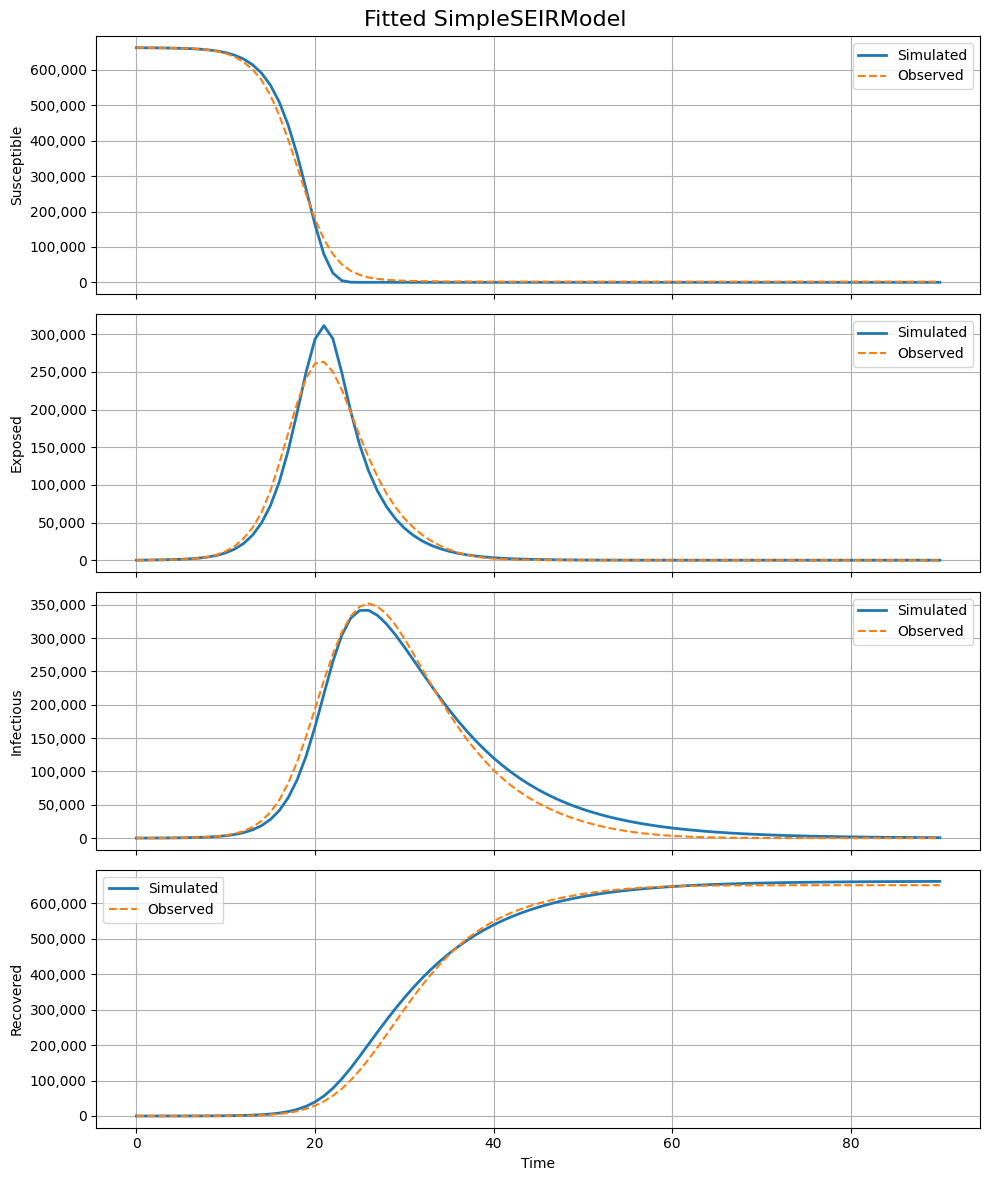

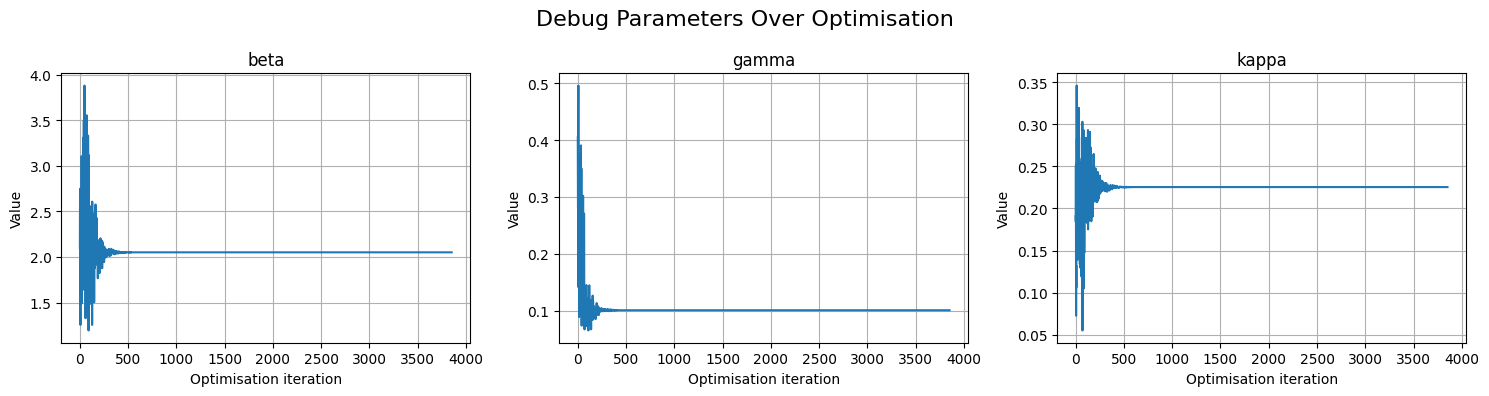

{'optimized_parameters': array([2.05118889, 0.22546231, 0.10045292]), 'log_posterior': -272318684.30034304, 'R_estimate': 4.2034464564896785, 'beta': 2.0511888944590275, 'kappa': 0.2254623050856784, 'gamma': 0.10045291948184083}


In [4]:

# Simple model
model = SimpleSEIRModel(initial_conditions)
result = model.fit_with_pints(times, observed, x0=[1.8, 1/5, 1/3])
print(result)


(91, 4)
[662754, 0, 100, 0]
Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 9
Iter. Eval. Best      Current   Time    
0     9     -inf      -inf        0:00.0
1     18    -2.79e+11 -2.79e+11   0:00.0
2     27    -2.79e+11 -2.79e+11   0:00.0
3     36    -2.79e+11 -2.79e+11   0:00.0
20    189   -2.79e+11 -2.79e+11   0:00.1
40    369   -2.79e+11 -2.79e+11   0:00.2
60    549   -2.79e+11 -2.79e+11   0:00.2
80    729   -2.79e+11 -2.79e+11   0:00.3
100   909   -2.79e+11 -2.79e+11   0:00.4
120   1089  -2.79e+11 -2.79e+11   0:00.5
140   1269  -2.79e+11 -2.79e+11   0:00.5
160   1449  -2.79e+11 -2.79e+11   0:00.6
180   1629  -2.79e+11 -2.79e+11   0:00.7
200   1809  -2.79e+11 -2.79e+11   0:00.7
220   1989  -2.79e+11 -2.79e+11   0:00.8
240   2169  -2.79e+11 -2.79e+11   0:00.9
260   2349  -2.79e+11 -2.79e+11   0:00.9
280   2529  -2.79e+11 -2.79e+11   0:01.0
300   2709  -2.79e+11 -2.79e+11   0:01.1
320   2889  -2.79e+11 -2.79e+11   0

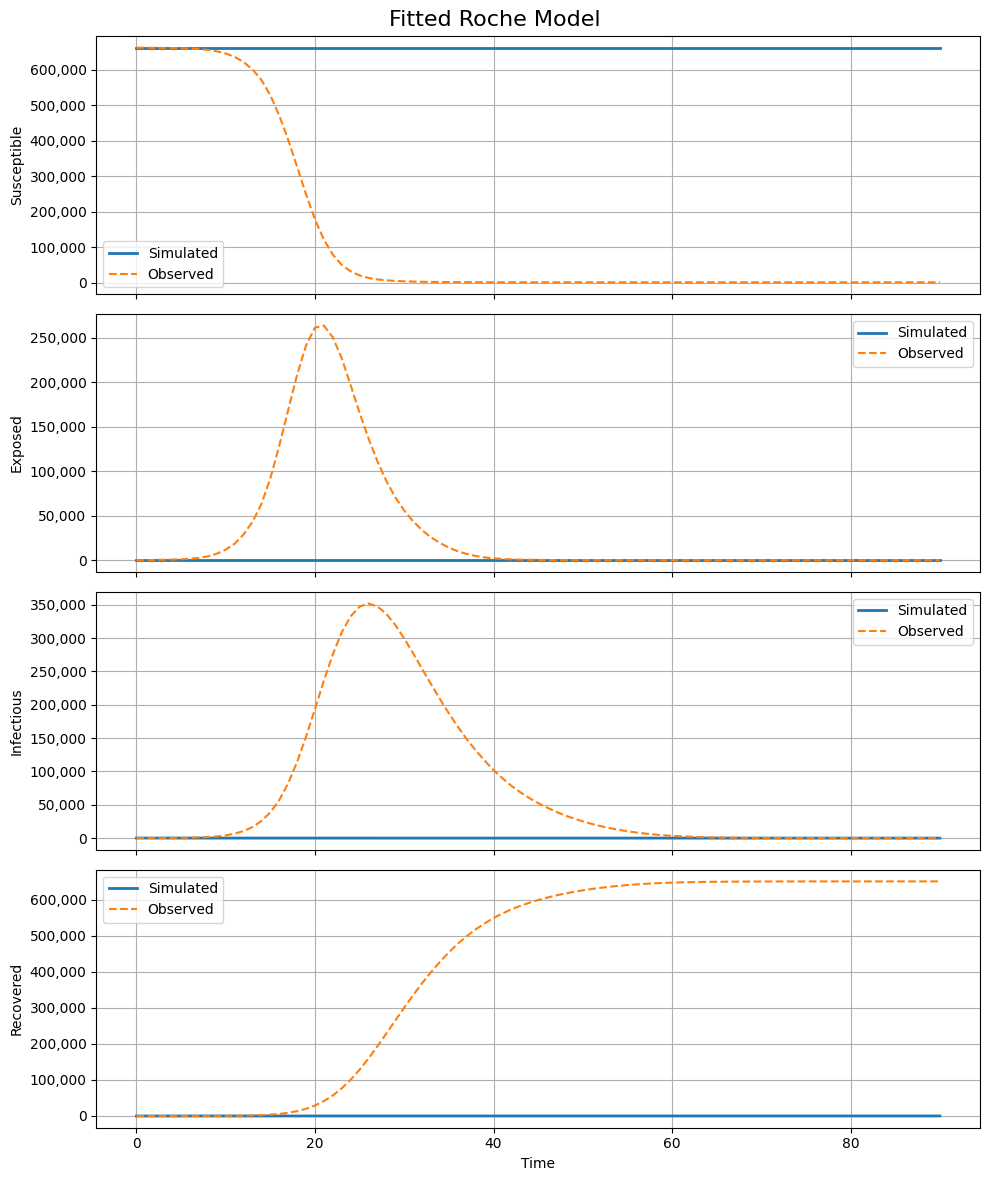

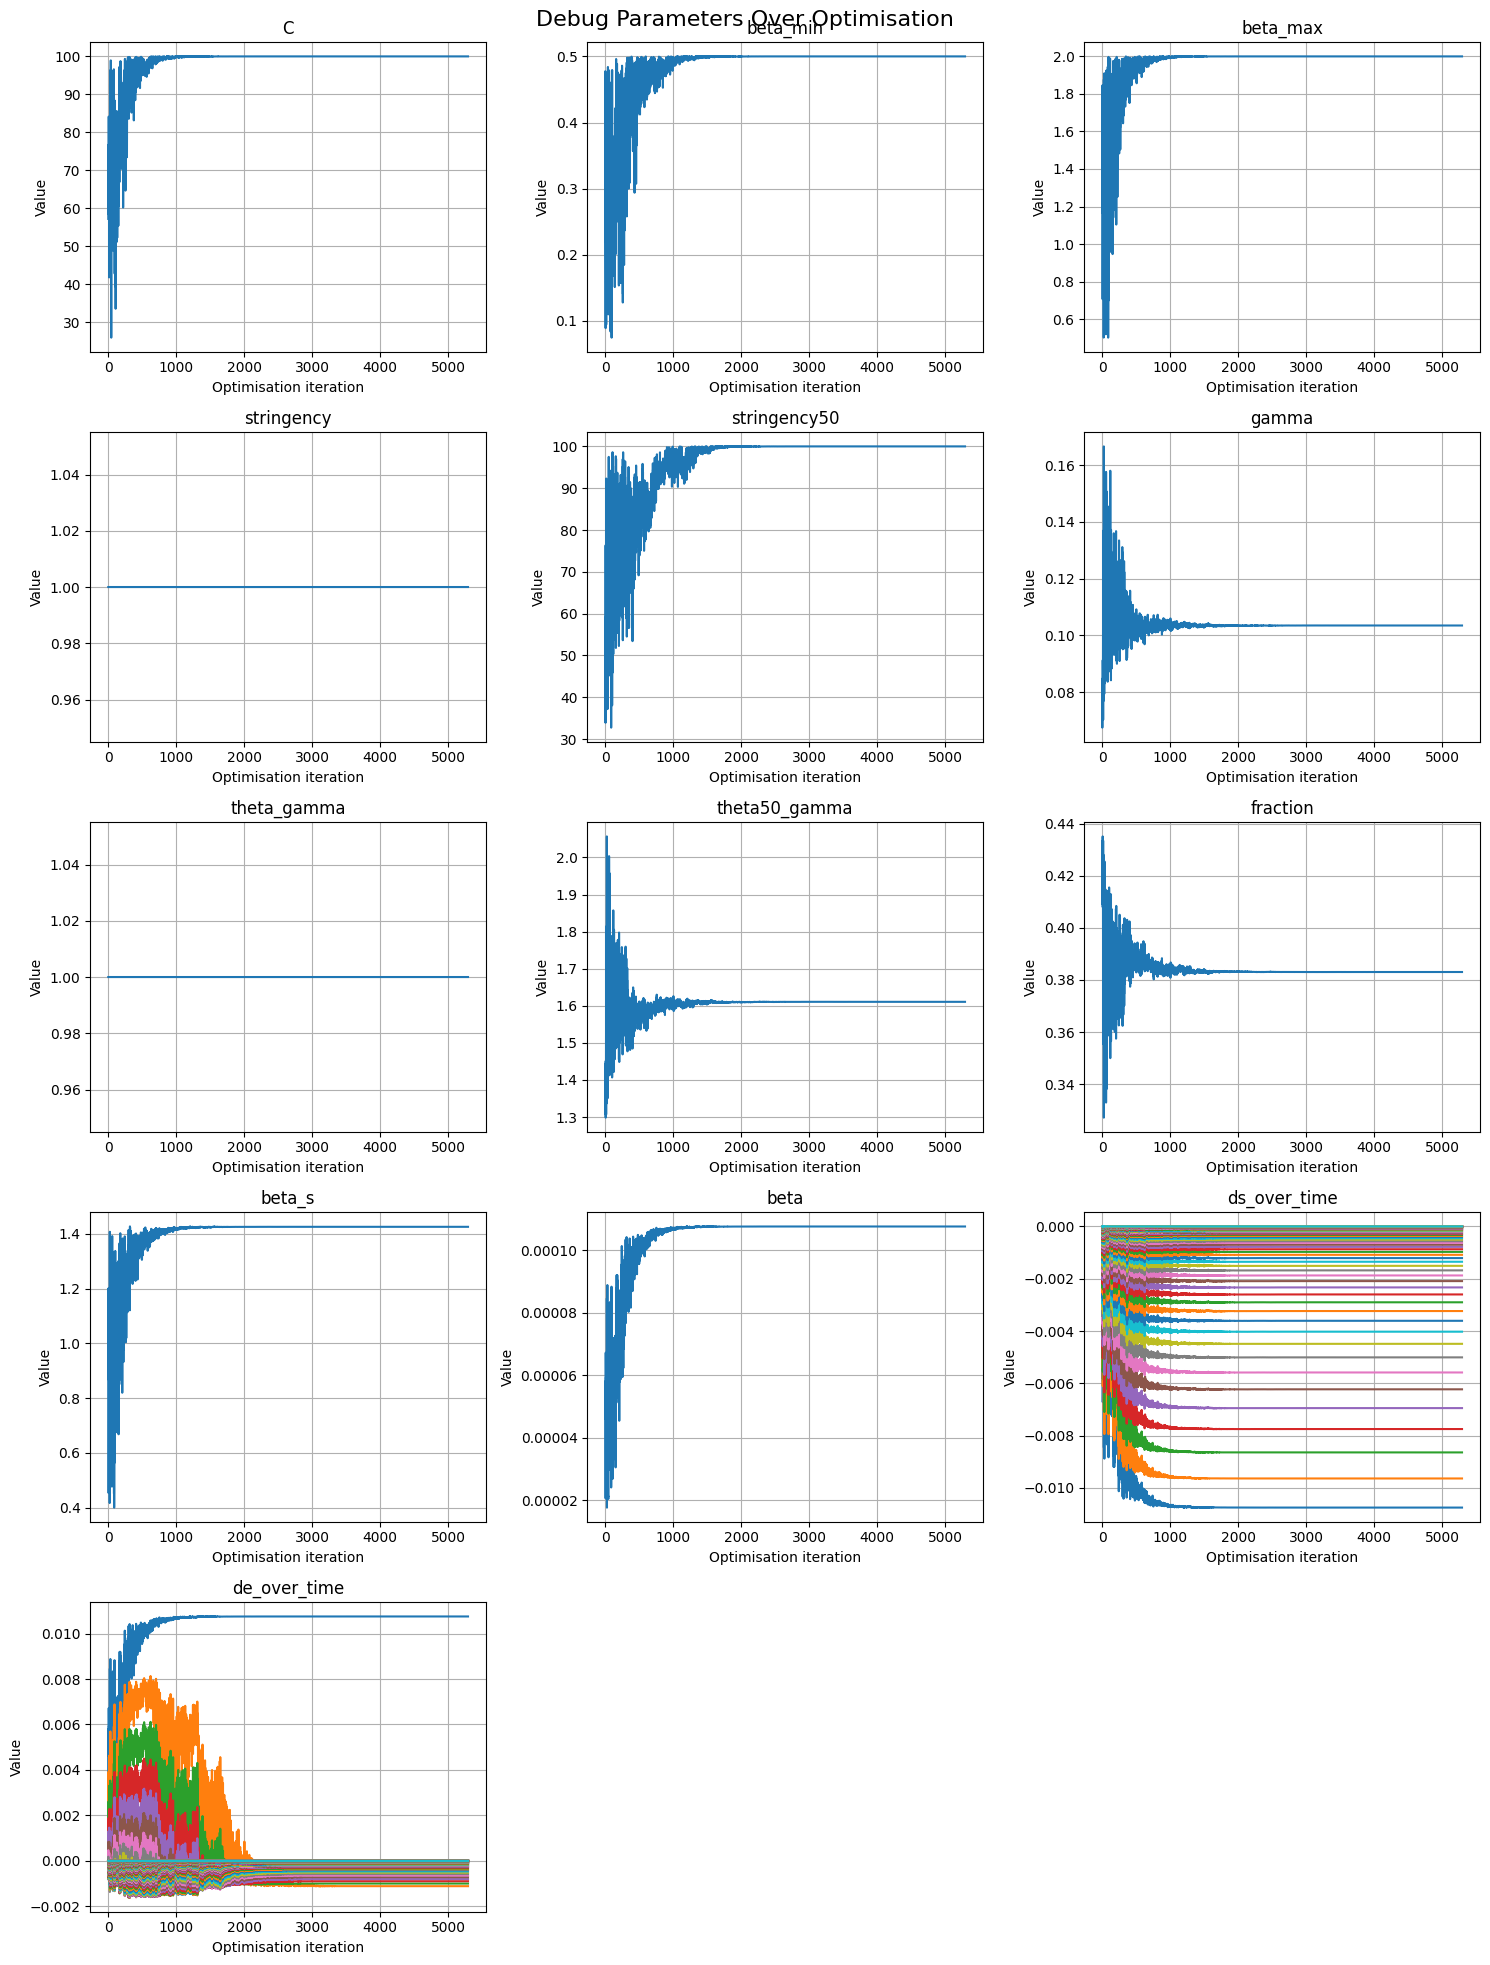

{'optimized_parameters': array([99.99999998,  0.5       ,  2.        , 99.9999989 ,  1.00000088,
        8.16261416,  1.49904083]), 'log_posterior': -278598388900.9227, 'R_estimate': 0.0010386881107685242, 'beta': 0.00010752236894802261, 'kappa': 0.9999991179891531, 'gamma': 0.10350193635977553}


In [5]:
# Roche model
model = RocheModel(initial_conditions)
print(observed.shape)
print(initial_conditions)
times = np.arange(91)
result = model.fit_with_pints(times, observed, x0 = [50, 0.5, 3.0, 50, 5, 5, 5])
print(result)

In [6]:
# Minimal test without loading data
initial_conditions = [599000, 0, 100, 0]

times = np.linspace(0, 100, 250)
parameters = [
    35,      # C: scaling factor (unitless)
    0.135,    # beta_min: minimum daily infection rate
    1.08,     # beta_max: maximum infection rate (symptomatic, no mitigation)
    50,     # stringency index (%)
    60,     # max stringency (%)
    2.59,     # k: time to become infectious after exposure (days)
    10,     # k_s: time from infectiousness to symptom onset (days)
    10,      # k_ri: time to recover for asymptomatic/mild cases (days)
]


model = RocheModel(initial_conditions)
states = model.simulate(parameters, times)

model.plot(times, states, title="Roche Model Synthetic Test")

ValueError: too many values to unpack (expected 7)

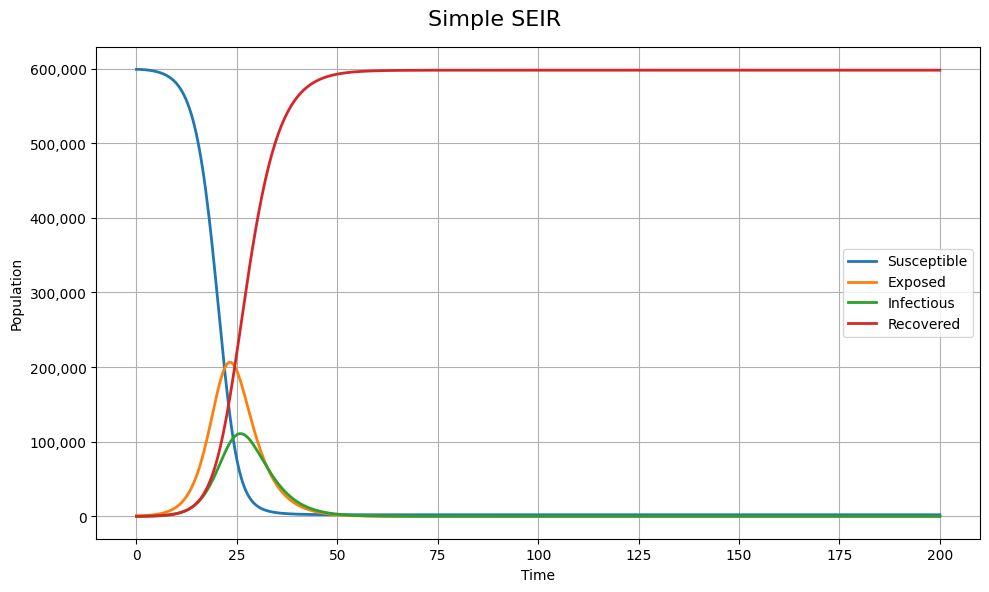

In [ ]:
model = SimpleSEIRModel(initial_conditions=[599000, 1000, 0, 0])
params = [1.8, 1/5, 1/3]
times = np.linspace(0, 200, 500)
sim = model.simulate(params, times)
model.plot(times, sim, title="Simple SEIR")